# *PROJETO DE CIÊNCIA DE DADOS*

## Estudo de caso para redução do CHURN (Retenção de clientes)
### Análise de dados e construção de modelos de Machine Learning
##### Problema:
- Prever os clientes com um alto risco de Churn.

### Importando o Arquivo CSV:
##### Coletando os dados e criando o dataframe Pandas

In [42]:
import pandas as pd

In [43]:
url = "https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv"

In [44]:
dados_coletados = pd.read_csv(url)

### Quais variáveis estão disponíveis no dataset?

In [45]:
print(dados_coletados.columns.values)

['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


In [46]:
dados_coletados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
dados_coletados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Eliminando as colunas que não agregam valor aos dados:
###### São variáveis nominais que por serem distintas não configuram grupos ou características específicas

In [48]:
for coluna in ['RowNumber','CustomerId','Surname']:
    print('Qtd de valores distintos de','"',coluna,'": ', len(dados_coletados[coluna].unique()))

Qtd de valores distintos de " RowNumber ":  10000
Qtd de valores distintos de " CustomerId ":  10000
Qtd de valores distintos de " Surname ":  2932


In [49]:
dados_uteis = dados_coletados.drop(columns = ['RowNumber','CustomerId','Surname'])
dados_uteis

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Verificando valores nulos:
##### Não foram encontrados valores faltantes na base de dados

In [50]:
dados_uteis.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Elegendo a variável alvo:
##### Coluna que representa a resposta para a pergunta proposta pelo problema
- Determinado elemento da base de dados deixará de ser cliente?)

In [51]:
coluna_resposta = dados_uteis['Exited']

### Quais variáveis são categóricas?
- Categóricas: Geography, HasCrCard, Gender, Exited, NumOfProducts e IsActiveMember.

### Quais variáveis são contínuas?
- Contínuas: 'CreditScore','Balance','Age','EstimatedSalary' e 'Tenure'

In [52]:
lista_continuas=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
lista_continuas

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [53]:
lista_categoricas = list(set(dados_uteis)-set(lista_continuas))
dados_categoricas=dados_uteis[lista_categoricas]
dados_categoricas

,Exited,HasCrCard,IsActiveMember,Geography,Gender,NumOfProducts
0,1,1,1,France,Female,1
1,0,0,1,Spain,Female,1
2,1,1,0,France,Female,3
3,0,0,0,France,Female,2
4,0,1,1,Spain,Female,1
...,...,...,...,...,...,...
9995,0,1,0,France,Male,2
9996,0,1,1,France,Male,1
9997,1,0,1,France,Female,1
9998,1,1,0,Germany,Male,2


### Transformando variáveis dicotômicas não numéricas em numéricas (0 e 1)
##### São variáveis binárias, que possuem dois valores possíveis 
- Por exemplo a coluna "Gender"

In [54]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dados_uteis['Gender'] = le.fit_transform(dados_uteis['Gender']) 
dados_uteis.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Tranformando variáveis contínuas em números reais no intervalo entre 0 e 1.
##### Normalização de variáveis numéricas contínuas para igualar o peso entre outras colunas

In [55]:
from sklearn.preprocessing import MinMaxScaler
dados_uteis[lista_continuas] = MinMaxScaler().fit_transform(dados_uteis[lista_continuas])
dados_uteis[lista_continuas]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


### Separando a variável alvo da tabela de treino
##### A coluna "Exited"   será o "supervisor" na aplicação de algoritmos supervisionados de Machine Learning.

In [56]:
dados_independentes = dados_uteis.drop('Exited',axis = 1)

### Transformando variáveis categóricas multivaloradas
##### Representando variáveis nominais como 0 e 1 em novas colunas.

In [57]:
dados_independentes = pd.get_dummies (data = dados_independentes, columns=['Geography','NumOfProducts'] )
dados_independentes

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,1,0,0,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,1,0,0,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,0,0,1,0,0,0
9998,0.844,1,0.324324,0.3,0.299226,1,0,0.464429,0,1,0,0,1,0,0


### Separando 25% dos dados para tabela de teste e 75% para tabela de treino do modelo.

In [58]:
from sklearn.model_selection import train_test_split 

dados_treino, dados_teste, coluna_resposta_treino,coluna_resposta_teste  = train_test_split(dados_independentes, coluna_resposta, test_size = 0.25,random_state = 1)
dados_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


### 11.Treinando o modelo de Machine Learning utilizando o algoritmo KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

#Treinando o modelo a partir dos dados de treino e respectiva coluna resposta
robo_treinado_por_knn = KNeighborsClassifier(n_neighbors=17).fit(dados_treino, coluna_resposta_treino)

#Gerando uma coluna resposta a partir da aplicação do modelo aos dados de teste (previsão)
coluna_resposta_previsao = robo_treinado_por_knn.predict(dados_teste)

#Confrontando a coluna reposta real com a coluna resposta previsão:
print (pd.crosstab(coluna_resposta_teste,coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

Previsão      0    1  Total
Realidade                  
0          1914   66   1980
1           361  159    520
Total      2275  225   2500


### 12. Encontrando o melhor valor para o parâmetro "número de vizinhos" para o KNN

In [60]:
import numpy as np #manipulação algebricas

#inicializando as variáveis
lista_erro_medio = []
menor_media_erro = 1

#Executando o KNN com valores diferentes de k para encontrar o valor de k que produz o menor erro médio:
for k in range(1, 40):
    
  robo_treinado_por_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                 weights='uniform').fit(dados_treino, coluna_resposta_treino)

  # aplica o modelo treinado(predição) e calcula a média de erros
  media_erro_atual = np.mean(robo_treinado_por_knn.predict(dados_teste) != coluna_resposta_teste)
  # aloca em uma lista os erros encontrados
  lista_erro_medio.append(float(media_erro_atual))
    
  #verifica e guarda o mehlor k e a menor media de erro  
  if media_erro_atual < menor_media_erro:
      menor_media_erro = media_erro_atual
      melhor_k = k
   
       
print (f"O melhor valor para k é: {melhor_k} que produz erro igual a : {menor_media_erro} ")

O melhor valor para k é: 17 que produz erro igual a : 0.1708 


Text(0, 0.5, 'Erro Médio')

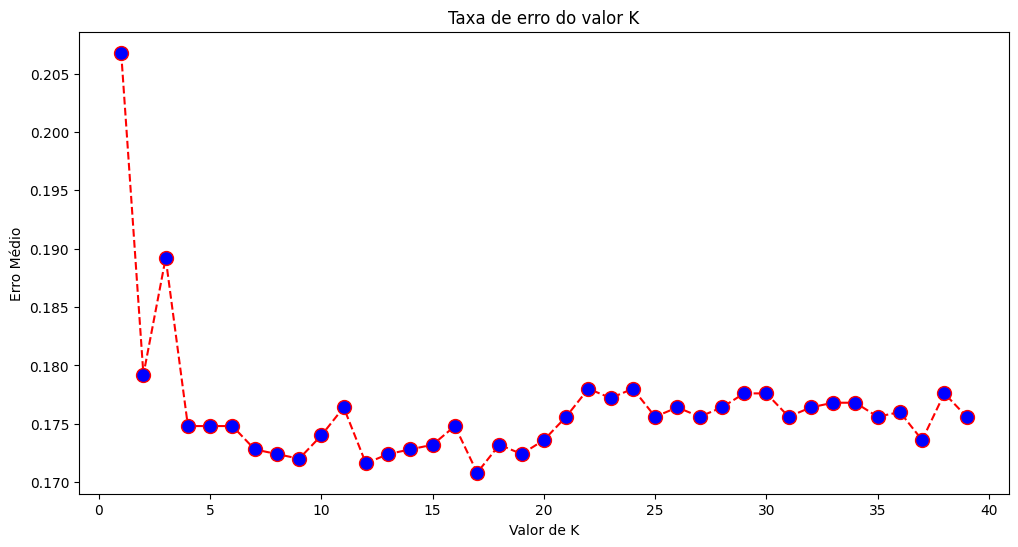

In [61]:
#imprime gráfico de (k x erro_médio)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), lista_erro_medio, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

### 13. Implementando o algoritmo Árvore de decisão:

In [62]:
# Importe o modelo que estamos usando 
from sklearn.tree import DecisionTreeClassifier, plot_tree 

# treinando o modelo por árvore de decisão:
robo_treinado_por_arvore = DecisionTreeClassifier(max_depth=4).fit(dados_treino, coluna_resposta_treino)
# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_arvore.predict(dados_teste)
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste,coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

Previsão      0    1  Total
Realidade                  
0          1916   64   1980
1           301  219    520
Total      2217  283   2500


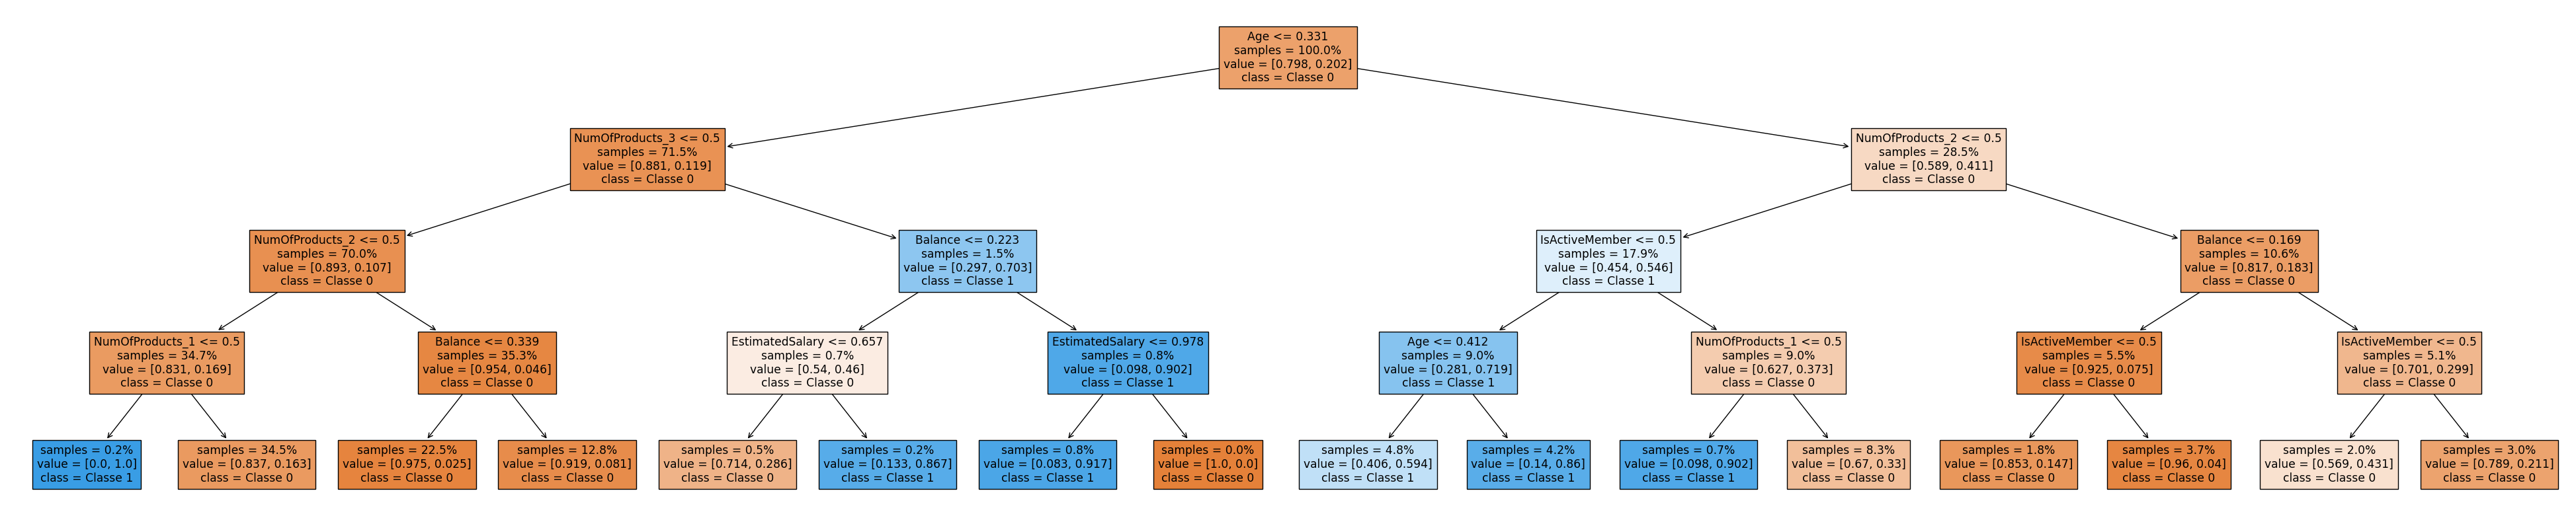

In [63]:
# imprimindo gráfico da árvore:
import matplotlib.pyplot as plt

plt.figure(figsize = (50,10))
plot_tree(robo_treinado_por_arvore, filled=True, proportion = True, impurity = False,
          class_names = ['Classe 0', 'Classe 1'], feature_names = dados_treino.columns)
plt.show()

### 14. Implementando o algoritmo Random Forest Classifier:

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo por Random Forest Classifier:
robo_treinado_por_rf = RandomForestClassifier (n_estimators = 1000, random_state = 42).fit (dados_treino, coluna_resposta_treino)
# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_rf.predict(dados_teste)
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste,coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

Previsão      0    1  Total
Realidade                  
0          1914   66   1980
1           266  254    520
Total      2180  320   2500


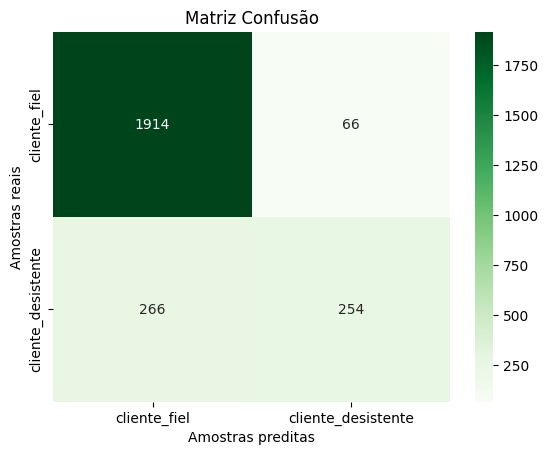

In [65]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(coluna_resposta_teste, coluna_resposta_previsao)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(matriz_confusao, annot=True, fmt='g', ax=ax, cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Rótulos e Títulos.
ax.set_xlabel('Amostras preditas');ax.set_ylabel('Amostras reais'); 
ax.set_title('Matriz Confusão'); 
ax.xaxis.set_ticklabels(['cliente_fiel', 'cliente_desistente']); ax.yaxis.set_ticklabels(['cliente_fiel', 'cliente_desistente']);

### 15. Verificando as métricas de classificação:

In [66]:
from sklearn.metrics import classification_report
print(classification_report(coluna_resposta_teste, coluna_resposta_previsao))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.49      0.60       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



In [67]:
#Analisando a importância de cada variável
feature_importances = pd.DataFrame(robo_treinado_por_rf.feature_importances_, index = dados_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.226898
EstimatedSalary,0.145037
Balance,0.143508
CreditScore,0.142218
Tenure,0.085945
NumOfProducts_2,0.055590
IsActiveMember,0.039993
NumOfProducts_3,0.038070
NumOfProducts_1,0.029783
Geography_Germany,0.021836


### 16. Implementando o algoritmo XGBClassifier:

In [68]:
#Importando as bibliotecas necessárias
from xgboost import XGBClassifier

# Treinando o modelo por XGB Classifier:
robo_treinado_por_xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27).fit(dados_treino, coluna_resposta_treino)

# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_xgb.predict(dados_teste)
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste,coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

Previsão      0    1  Total
Realidade                  
0          1896   84   1980
1           255  265    520
Total      2151  349   2500


In [69]:
#Verificando as métricas de classificação
from sklearn.metrics import classification_report
print(classification_report(coluna_resposta_teste, coluna_resposta_previsao))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1980
           1       0.76      0.51      0.61       520

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.86      0.85      2500



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

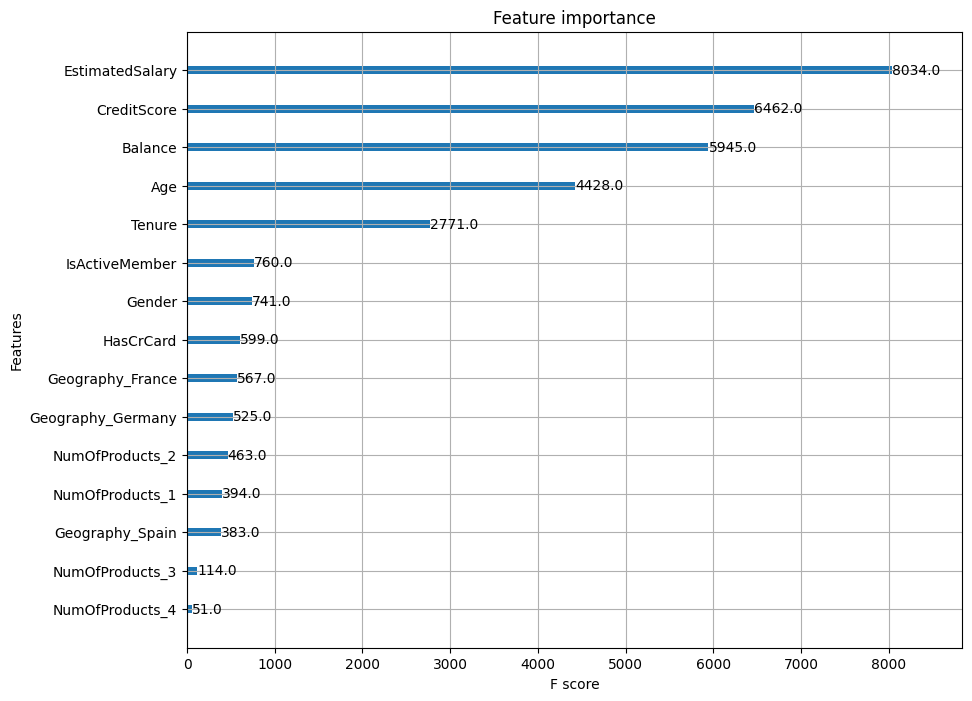

In [72]:
#Gráfico de importância das variáveis
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(robo_treinado_por_xgb, ax=ax)

### 17. Implementando o algoritmo Voting Classifier :
##### Combinando o algoritmo random forest com o xgb

In [73]:
from sklearn.ensemble import VotingClassifier


# Treinando o modelo por Voting classifer (combina dois modelos para obter mais performance)
robo_treinado_por_voto = VotingClassifier(estimators=[('rf', robo_treinado_por_rf),('xgb',robo_treinado_por_xgb)], voting='soft').fit(dados_treino, coluna_resposta_treino)
# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_voto.predict(dados_teste)
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste,coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

Previsão      0    1  Total
Realidade                  
0          1913   67   1980
1           261  259    520
Total      2174  326   2500


In [74]:
#Verificando o desempenho
print(classification_report(coluna_resposta_teste, coluna_resposta_previsao))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.50      0.61       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500



### Gerando a coluna de probabilidade da classe 1 ocorrer:
##### Sabendo quais os tipos de clientes que são propensos a desistir podemos determinar ações focadas e preventivas.

In [75]:
#[:,1] imprime apenas a classe 1, [:,0] imprime apenas a classe 0
dados_coletados['proba'] = robo_treinado_por_voto.predict_proba(dados_independentes)[:,1]
dados_coletados[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.759765
1,15647311,0.068673
2,15619304,0.986559
3,15701354,0.031795
4,15737888,0.024935
...,...,...
9995,15606229,0.001715
9996,15569892,0.014476
9997,15584532,0.727620
9998,15682355,0.060810


## Conclusão:
#### O modelo com melhor desempenho foi o XGBoost com acurácia de 86% e f1-score de 61%
- Apesar do Random Forest ter tido acurácia melhor de 87% o XGBoost previu melhor a classe 1.